## Data Analyse  : Donnée Titanic.

### Démarche :
 - Definir un objectif mesurable : 
   - Objectif : prédire si un passager aurait survécu ou pas.
   - Métrique : F1 -> 50% et Recall -> 70%. 
     - Précision : permet de réduire au maximum le nombre de faux positifs.
     - Recall (sensibilité) : permet de réduire au maximum le nombre de faux négatifs.
     - Score F1.
 - EDA (Exploratory data analysis)
 - Pre-processing.
 - Modeling

In [11]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statistics as st
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

Objectif: comprendre au maximum les données dont on dispose pour définir une stratégie de modélisation.

### Analyse de la forme:
 - Identification de la target : 'assur_caravane'
 - Nombre des lignes et de colonnes : (594, 12)
 - Identification des valeurs manquantes : 
 - Types de variables
	

### Analyse du fond:
 - Visualisation de la target (histogramme/boxplot)
 - Compréhension des différentes variables (recherche)
 - Visualisation des relations : features/target
 - Identification des outliers


### Pre-processing

#### Objectif: transformer le data pour le mettre dans un format propice au machine learning : 
- Création du Train Set / Test Set
- Élimination des NaN : dropna(), imputation, colonne"vides"
- Encodage
- Suppression des outliers néfastes au modèle
- Feature selection
- Feature engineering
- Feature scaling

### Modelling

Objectif: développer un modèle de machine learning capable de répondre a l'objectif final: 
- Définir une fonction d'évaluation
- Entrainement de différents modèles
- Optimisation avec GridSearchCV
- Analyse des erreurs et retour au Preprocessing / EDA
- Learning Curve et prise de décision

In [12]:
df= pd.read_csv('titanic.csv', sep = ",")
df = df.drop(columns = ['Unnamed: 0','PassengerId'])

In [13]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Analyse de la forme des données.

In [14]:
data = df.copy()

In [15]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         121
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       463
Embarked      1
dtype: int64

In [16]:
data.dtypes.value_counts()

object     5
int64      4
float64    2
dtype: int64

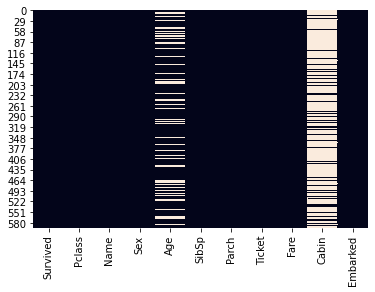

In [17]:
sb.heatmap(data.isna(), cbar=False)

In [18]:
(data.isna().sum()/data.shape[0]).sort_values()

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Embarked    0.001684
Age         0.203704
Cabin       0.779461
dtype: float64

In [22]:
Age = data['Age'] # on remplace les valeurs manquantes par la median
Age[Age.isna() == True] = Age.median()

In [23]:
data['Age'] = Age

In [25]:
data = data.drop(columns=['Cabin','Name', 'Ticket']) # on supprime les variables inutiles

KeyError: "['Cabin' 'Name' 'Ticket'] not found in axis"

In [196]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       1
dtype: int64

In [197]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

### Analyse de fond

### Histogrammes des variables quantitatives

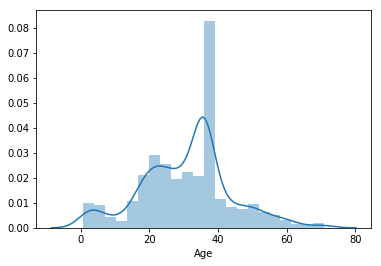

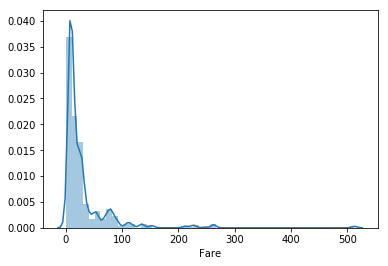

In [198]:
for col in data.select_dtypes('float64'):
    plt.figure()
    sb.distplot(data[col])

In [199]:
for col in data.select_dtypes('object'):
    print(col, data[col].unique())

Sex ['female' 'male']
Embarked ['S' 'C' 'Q' nan]


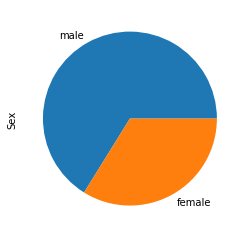

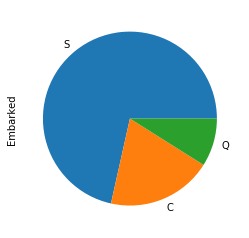

In [200]:
for col in data.select_dtypes('object'):
    plt.figure()
    data[col].value_counts().plot.pie()

### Relation Target/variable

#### Création des sous ensemble : Survi et non survi

In [201]:
survecu = data[data['Survived'] == 1]
nonsurvecu = data[data['Survived'] ==  0]

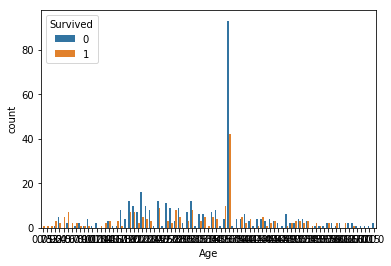

In [202]:
sb.countplot(x ='Age', hue = 'Survived', data = data)

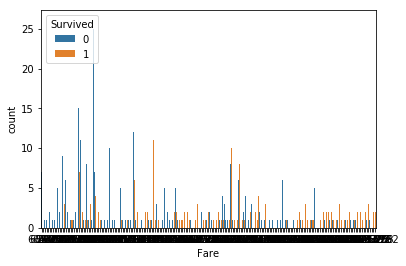

In [203]:
sb.countplot(x ='Fare', hue = 'Survived', data = data)

In [204]:
pd.crosstab(data['Survived'], data['Embarked'])

Embarked,C,Q,S
Survived,,,
0,53,34,286
1,63,19,138


In [205]:
pd.crosstab(data['Survived'], data['Sex'])

Sex,female,male
Survived,,
0,49,324
1,152,69


In [206]:
pd.crosstab(data['Survived'], data['Parch'])

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,315,32,23,0,1,1,1
1,157,38,23,2,0,1,0


In [207]:
pd.crosstab(data['Survived'], data['Pclass'])

Pclass,1,2,3
Survived,,,
0,48,68,257
1,91,56,74


In [208]:
pd.crosstab(data['Survived'], data['SibSp'])

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,276,59,10,8,12,3,5
1,130,75,11,3,2,0,0


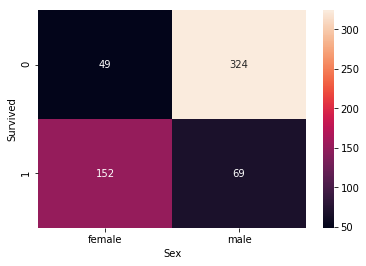

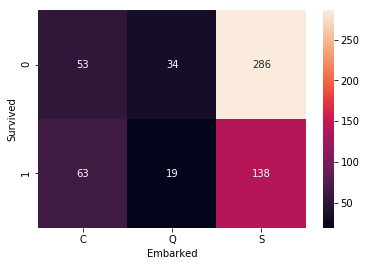

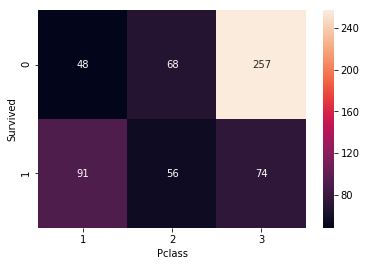

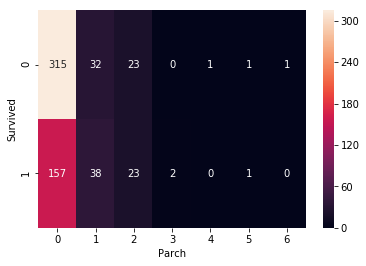

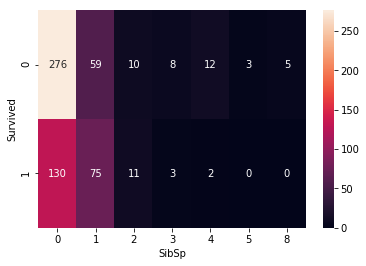

In [209]:
for col in ['Sex','Embarked','Pclass','Parch','SibSp']:
    plt.figure()
    sb.heatmap(pd.crosstab(data['Survived'], data[col]), annot=True, fmt = 'd')

## Pre-processing
- Objectif: Mettre les données dans un format propice au ML
  -  Train/Test
  - Encodage
  - Nettoyage des NaN

### Train-Test-Encodage-Nettoyage

In [26]:
df= pd.read_csv('titanic.csv', sep = ",")
df = df.drop(columns = ['Unnamed: 0','PassengerId'])

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
Age = df['Age']
Age[Age.isna() == True] = st.median(Age)
df['Age'] = Age

In [29]:
Embarked = df['Embarked']
Embarked[Embarked.isna() == True] = st.mode(Embarked)
df['Embarked'] = Embarked

In [30]:
trainset, testset = train_test_split(df, test_size = 0.2, random_state = 0)

In [31]:
trainset['Survived'].value_counts()

0    298
1    177
Name: Survived, dtype: int64

In [32]:
testset.shape

(119, 11)

In [33]:
df = df.drop(columns=['Name','Cabin','Ticket'])

### Encodage

In [34]:
for col in df.select_dtypes('object').columns:
    print(col)

Sex
Embarked


On definit une fonction encodage pour remplacer les valeurs des variables Embarked et Sex en des valeurs numériques et une fonction preprocessing qui nous permet de diviser 

In [35]:
def encodage(df):
    
    code  = {'S':1, 
             'C':2, 
             'Q':3, 
             'female':1,
             'male':2}
    for col in df.select_dtypes('object').columns:
        df[col] = df[col].map(code)  
        
    return df

In [36]:
def preprocessing(df):
    
    df = encodage(df)
    
    X = df.drop(columns=['Survived','Cabin','Name','Ticket'], axis = 1)
    y = df['Survived']
    print(y.value_counts())
    return X,y

In [448]:
X_train, y_train = preprocessing(trainset)

0    298
1    177
Name: Survived, dtype: int64


In [449]:
X_test, y_test = preprocessing(testset)

0    75
1    44
Name: Survived, dtype: int64


In [450]:
X_train.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Modelisation

In [529]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [490]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False) ,SelectKBest(f_classif, k = 4))

In [501]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
LogReg = make_pipeline(preprocessor, StandardScaler(), LogisticRegression())

In [503]:
list_model = {'RandomForest': RandomForest, 'AdaBoost': AdaBoost, 
              'SVM': SVM, 'KNN': KNN, 'LogisticReg' : LogReg}

RandomForest
[[62 13]
 [14 30]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        75
           1       0.70      0.68      0.69        44

   micro avg       0.77      0.77      0.77       119
   macro avg       0.76      0.75      0.76       119
weighted avg       0.77      0.77      0.77       119



/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost
[[62 13]
 [14 30]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        75
           1       0.70      0.68      0.69        44

   micro avg       0.77      0.77      0.77       119
   macro avg       0.76      0.75      0.76       119
weighted avg       0.77      0.77      0.77       119

SVM
[[62 13]
 [14 30]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        75
           1       0.70      0.68      0.69        44

   micro avg       0.77      0.77      0.77       119
   macro avg       0.76      0.75      0.76       119
weighted avg       0.77      0.77      0.77       119

KNN
[[74  1]
 [22 22]]
              precision    recall  f1-score   support

           0       0.77      0.99      0.87        75
           1       0.96      0.50      0.66        44

   micro avg       0.81      0.81      0.81       119
   macro avg       0.86      0.74      0.76       119


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

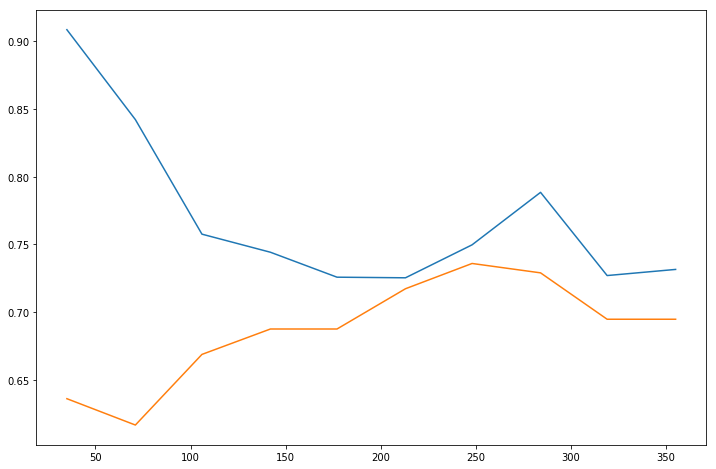

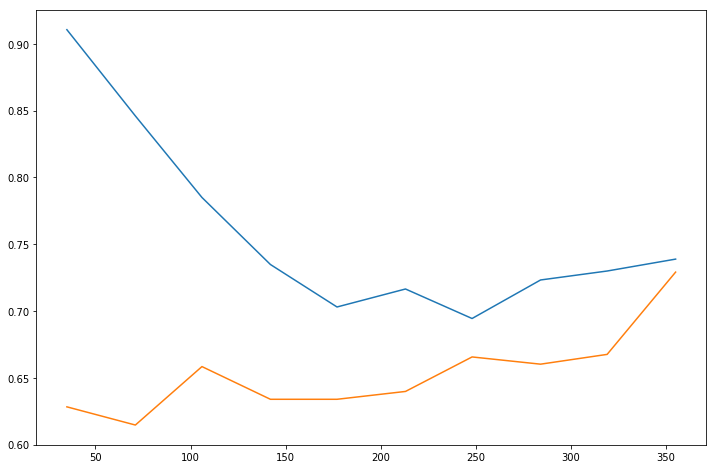

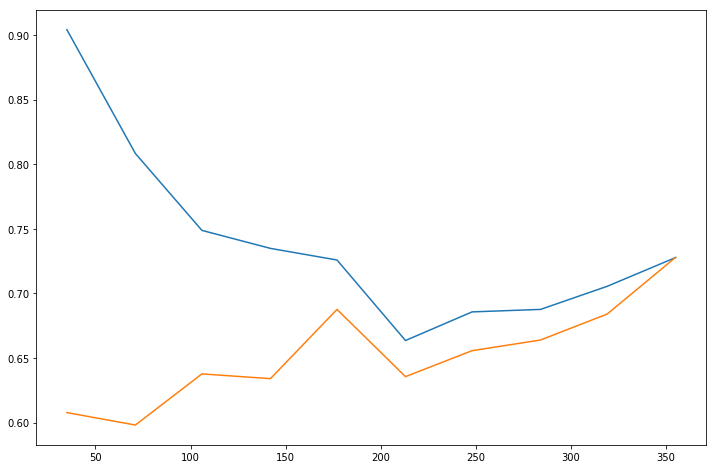

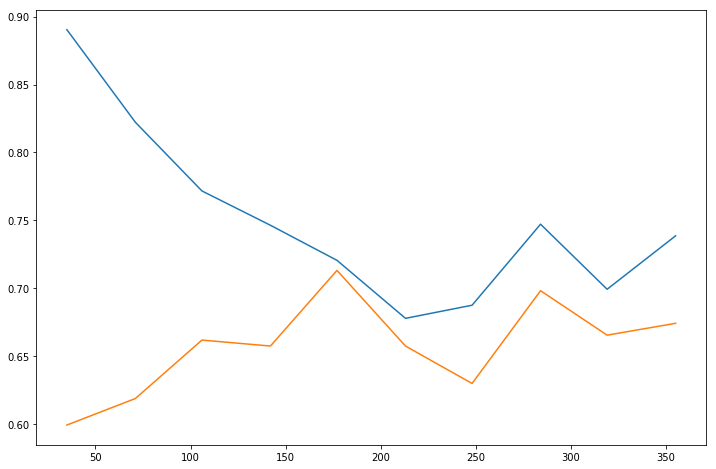

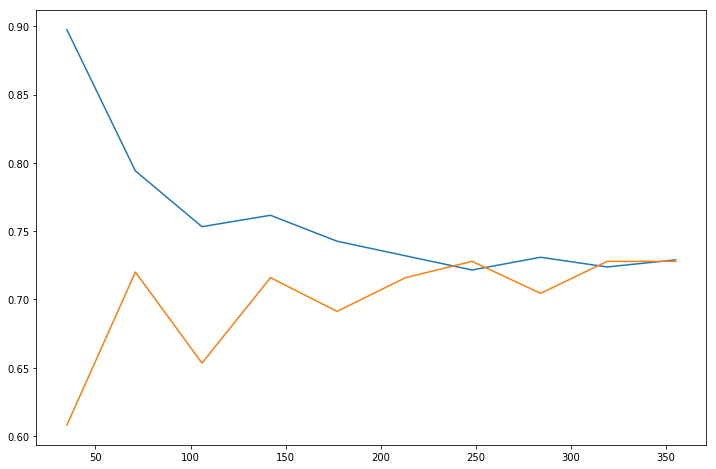

In [504]:
for name, model in list_model.items():
    print(name)
    evaluation(model)

### Procédure d'évaluation 

In [461]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve

In [471]:
def evaluation(model):
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                               cv = 4, scoring = 'f1',
                                               train_sizes = np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis = 1))
    plt.plot(N, val_score.mean(axis = 1))

/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [0] are constant.
  UserW

[[62 13]
 [14 30]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        75
           1       0.70      0.68      0.69        44

   micro avg       0.77      0.77      0.77       119
   macro avg       0.76      0.75      0.76       119
weighted avg       0.77      0.77      0.77       119



/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.6/site-packages/sklearn/featu

/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


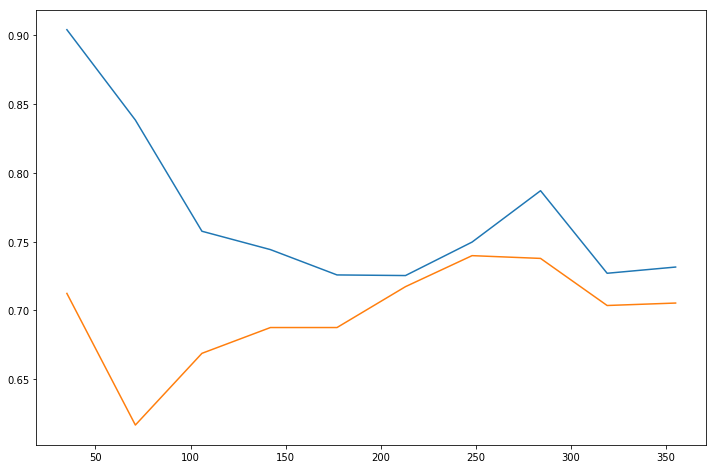

In [475]:
evaluation(model)

### Optimisation

In [549]:
SVM

Pipeline(memory=None,
     steps=[('pipeline', Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('selectkbest', SelectKBest(k=4, score_func=<function f_classif at 0x7f6604074840>))])), ('standardscaler', StandardScaler(copy=True, with_mean=True...'rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False))])

In [540]:
hyper_param = {'svc__gamma': [1e-3, 1e-4], 
               'svc__C': [1,10,100,1000],
              'pipeline__polynomialfeatures__degree': [2,3,4]}

In [541]:
grid = RandomizedSearchCV(SVM, hyper_param, scoring='recall', cv=4, n_iter=10)

In [542]:
grid.fit(X_train,y_train)

RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('pipeline', Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('selectkbest', SelectKBest(k=4, score_func=<function f_classif at 0x7f6604074840>))])), ('standardscaler', StandardScaler(copy=True, with_mean=True...'rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False))]),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'svc__gamma': [0.001, 0.0001], 'svc__C': [1, 10, 100, 1000], 'pipeline__polynomialfeatures__degree': [2, 3, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='recall', verbose=0)

In [543]:
print(grid.best_params_)
ypred = grid.predict(X_test)
print(classification_report(y_test,ypred))

{'svc__gamma': 0.0001, 'svc__C': 10, 'pipeline__polynomialfeatures__degree': 4}
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        75
           1       0.70      0.68      0.69        44

   micro avg       0.77      0.77      0.77       119
   macro avg       0.76      0.75      0.76       119
weighted avg       0.77      0.77      0.77       119



[[62 13]
 [14 30]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        75
           1       0.70      0.68      0.69        44

   micro avg       0.77      0.77      0.77       119
   macro avg       0.76      0.75      0.76       119
weighted avg       0.77      0.77      0.77       119



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-sco

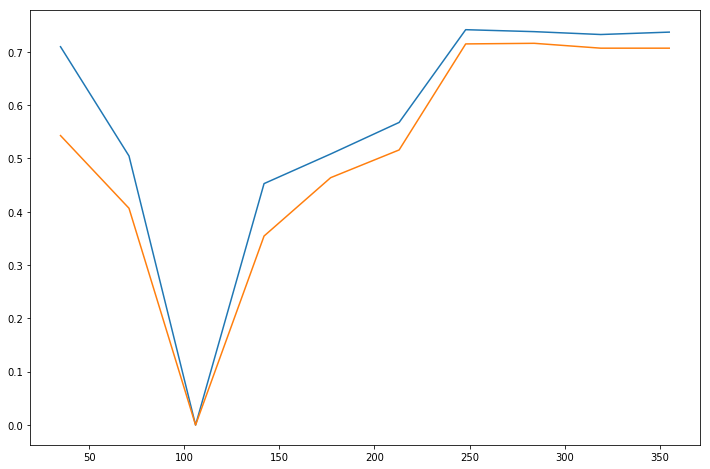

In [545]:
evaluation(grid.best_estimator_)

### Precision Recall Curve

In [546]:
from sklearn.metrics import precision_recall_curve

In [551]:
precision, recall, threshold = precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))

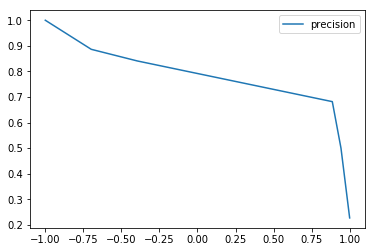

In [561]:
precision, recall, threshold = precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))
plt.plot(threshold,recall[:-1], label = 'precision')
plt.legend()

In [562]:
LogReg

Pipeline(memory=None,
     steps=[('pipeline', Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('selectkbest', SelectKBest(k=4, score_func=<function f_classif at 0x7f6604074840>))])), ('standardscaler', StandardScaler(copy=True, with_mean=True...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [563]:
model_final = LogisticRegression()

In [564]:
model.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('pipeline', Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('selectkbest', SelectKBest(k=4, score_func=<function f_classif at 0x7f6604074840>))])), ('standardscaler', StandardScaler(copy=True, with_mean=True...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [569]:
param = {'tol' :np.linspace(0.00001,1,5), 'C': [1.0,2,3,4,5]}

In [570]:
Grid = RandomizedSearchCV(model_final, param, cv = 4, n_iter=10)

In [571]:
Grid.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'tol': array([1.00000e-05, 2.50007e-01, 5.00005e-01, 7.50003e-01, 1.00000e+00]), 'C': [1.0, 2, 3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [576]:
print(Grid.best_params_)
ypredL = Grid.predict(X_test)
print(classification_report(y_test,ypredL))

{'tol': 1e-05, 'C': 3}
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        75
           1       0.67      0.70      0.69        44

   micro avg       0.76      0.76      0.76       119
   macro avg       0.75      0.75      0.75       119
weighted avg       0.77      0.76      0.77       119



In [577]:
confusion_matrix(y_test,ypredL)

array([[60, 15],
       [13, 31]])

In [578]:
confusion_matrix(y_test,ypred)

array([[62, 13],
       [14, 30]])

In [580]:
ypredk = KNN.predict(X_test)

In [581]:
confusion_matrix(y_test,ypredk)

array([[74,  1],
       [22, 22]])

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[[62 13]
 [13 31]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        75
           1       0.70      0.70      0.70        44

   micro avg       0.78      0.78      0.78       119
   macro avg       0.77      0.77      0.77       119
weighted avg       0.78      0.78      0.78       119



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

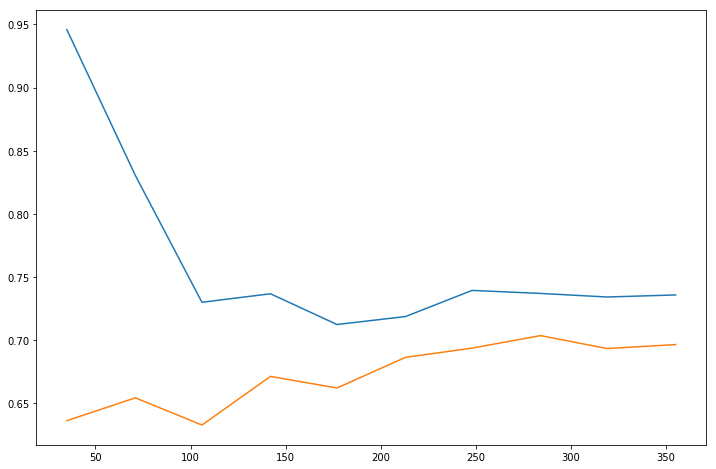

In [582]:
evaluation(model_final)

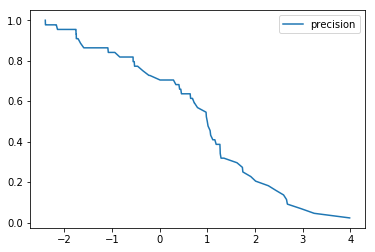

In [583]:
precision, recall, threshold = precision_recall_curve(y_test,Grid.best_estimator_.decision_function(X_test))
plt.plot(threshold,recall[:-1], label = 'precision')
plt.legend()

In [587]:
X_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [586]:
model_final.predict(Abdirzk)

ValueError: Expected 2D array, got 1D array instead:
array=[   1   25    0    0 1200    3].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.